# Contexto IA
## Trabalho
## Projeto: Context Nutrion

Vocês foram designados para fornecer a inteligência do aplicativo "Context Nutrion".

O Context Nutrion pega a quantidade de passos das smarts bands e a quantidade de calorias consumidas nas refeições do usuário, nos períodos da manhã, tarde e noite.

Por meio destas informações, e do perfíl do usuário, o aplicativo é capaz de sugerir quantas calorias o usuário deverá consumir em cada período do dia.

Neste projeto, o perfíl do usuário foi traçado como:
- ingerir até 1630 calorias
- realizar no mínimo 10000 passos

In [5]:
import numpy as np
import pandas as pd
# from sklearn.model_selection import ShuffleSplit

# Permite visualizar os dados da melhor forma possível
# como estamos utilizando um arquivo HTML, o método display irá exibir uma tabela
# veja mais em: https://ipython.org/ipython-doc/3/api/generated/IPython.display.html#module-IPython.display
from IPython.display import display

# Carregar os dados
full_data = pd.read_csv('trabalho_data.csv')
    
display(full_data)

,DIA,DATA,PMANHA,PTARDE,PNOITE,CMANHA,CTARDE,CNOITE
0,dom,01/05/2016,274,2514,2353,356,1015,996
1,seg,02/05/2016,4581,1887,5847,409,681,645
2,ter,03/05/2016,4786,2286,4942,390,604,636
3,quar,04/05/2016,4508,2977,5896,400,577,925
4,qui,05/05/2016,4829,2656,4913,425,737,565
5,sex,06/05/2016,4626,2836,6239,430,587,844
6,sab,07/05/2016,1648,503,3528,372,582,983
7,dom,08/05/2016,386,870,2853,713,912,1008
8,seg,09/05/2016,4888,1548,5619,426,696,581
9,ter,10/05/2016,4901,1960,4542,439,545,646


## 1 Anális de Dados

### Calcúle as informações estatísticas padrões para o valor

- 1.1 De forma geral, o usuário consgue ficar na méta traçada dos 10000 passos e 16300 calorias?
    - ***tip***: calcule as médias de toda a amostra, e calcule a média diária e com isso fundamente a sua resposta

- 1.2 Em qual momento o usuário dá mais passos e consome mais calorias no geral?
    - ***tip***: você pode utilizar as médias calculadas

- 1.3 Quais os dias da semana em que o usuário anda mais, consome mais calorias?
    - ***tip***: com as médias de todos os dias calculadas veja de qual dia é a maior
    
- 1.4 O usuário segue alguma rotina?
    - ***tip***: calcule o desvio padrão dos passos e das calorias gerais, e faça o mesmo para cada dia. Use essas informações para justificar a sua resposta

In [36]:
passos = full_data['PASSOS_DIA'] = full_data['PMANHA'] + full_data['PTARDE'] + full_data['PNOITE']
calorias = full_data['CAL_DIA'] = full_data['CMANHA'] + full_data['CTARDE'] + full_data['CNOITE']

passos_media_manha = np.mean(full_data['PMANHA'])
passos_media_tarde = np.mean(full_data['PTARDE'])
passos_media_noite = np.mean(full_data['PNOITE'])
passos_media_total = np.mean(passos)
passos_std = np.std(passos)
cal_media_manha = np.mean(full_data['CMANHA'])
cal_media_tarde = np.mean(full_data['CTARDE'])
cal_media_noite = np.mean(full_data['CNOITE'])
cal_media_total = np.mean(calorias)
cal_std = np.std(calorias)
print ('Passos media manhã: ', passos_media_manha, end='\t')
print ('Passos media tarde: ', passos_media_tarde, end='\t')
print ('Passos media noite: ', passos_media_noite)
print ('Passos media total: ', passos_media_total)
print ('Passos desvio padrão: ', passos_std)
print ('Calorias media manha: ', cal_media_manha, end='\t')
print ('Calorias media tarde: ', cal_media_tarde, end='\t')
print ('Calorias media noite: ', cal_media_noite)
print ('Calorias media total: ', cal_media_total)
print ('Calorias desvio padrão: ', cal_std)

media_passos_seg = np.mean(full_data['PASSOS_DIA'][full_data['DIA'] == 'seg'])
media_passos_ter = np.mean(full_data['PASSOS_DIA'][full_data['DIA'] == 'ter'])
media_passos_qua = np.mean(full_data['PASSOS_DIA'][full_data['DIA'] == 'quar'])
media_passos_qui = np.mean(full_data['PASSOS_DIA'][full_data['DIA'] == 'qui'])
media_passos_sex = np.mean(full_data['PASSOS_DIA'][full_data['DIA'] == 'sex'])
media_passos_sab = np.mean(full_data['PASSOS_DIA'][full_data['DIA'] == 'sab'])
media_passos_dom = np.mean(full_data['PASSOS_DIA'][full_data['DIA'] == 'dom'])
std_passos_seg = np.std(full_data['PASSOS_DIA'][full_data['DIA'] == 'seg'])
std_passos_ter = np.std(full_data['PASSOS_DIA'][full_data['DIA'] == 'ter'])
std_passos_qua = np.std(full_data['PASSOS_DIA'][full_data['DIA'] == 'quar'])
std_passos_qui = np.std(full_data['PASSOS_DIA'][full_data['DIA'] == 'qui'])
std_passos_sex = np.std(full_data['PASSOS_DIA'][full_data['DIA'] == 'sex'])
std_passos_sab = np.std(full_data['PASSOS_DIA'][full_data['DIA'] == 'sab'])
std_passos_dom = np.std(full_data['PASSOS_DIA'][full_data['DIA'] == 'dom'])
print ('\nMedia passos dom: ', "{0:.2f}".format(media_passos_dom), '- desvio padrão: ', "{0:.2f}".format(std_passos_dom))
print ('Media passos seg: ', "{0:.2f}".format(media_passos_seg), '- desvio padrão: ', "{0:.2f}".format(std_passos_seg))
print ('Media passos ter: ', "{0:.2f}".format(media_passos_ter), '- desvio padrão: ', "{0:.2f}".format(std_passos_ter))
print ('Media passos qua: ', "{0:.2f}".format(media_passos_qua), '- desvio padrão: ', "{0:.2f}".format(std_passos_qua))
print ('Media passos qui: ', "{0:.2f}".format(media_passos_qui), '- desvio padrão: ', "{0:.2f}".format(std_passos_qui))
print ('Media passos sex: ', "{0:.2f}".format(media_passos_sex), '- desvio padrão: ', "{0:.2f}".format(std_passos_sex))
print ('Media passos sab: ', "{0:.2f}".format(media_passos_sab), '- desvio padrão: ', "{0:.2f}".format(std_passos_sab))


media_cal_seg = np.mean(full_data['CAL_DIA'][full_data['DIA'] == 'seg'])
media_cal_ter = np.mean(full_data['CAL_DIA'][full_data['DIA'] == 'ter'])
media_cal_qua = np.mean(full_data['CAL_DIA'][full_data['DIA'] == 'quar'])
media_cal_qui = np.mean(full_data['CAL_DIA'][full_data['DIA'] == 'qui'])
media_cal_sex = np.mean(full_data['CAL_DIA'][full_data['DIA'] == 'sex'])
media_cal_sab = np.mean(full_data['CAL_DIA'][full_data['DIA'] == 'sab'])
media_cal_dom = np.mean(full_data['CAL_DIA'][full_data['DIA'] == 'dom'])
std_cal_seg = np.std(full_data['CAL_DIA'][full_data['DIA'] == 'seg'])
std_cal_ter = np.std(full_data['CAL_DIA'][full_data['DIA'] == 'ter'])
std_cal_qua = np.std(full_data['CAL_DIA'][full_data['DIA'] == 'quar'])
std_cal_qui = np.std(full_data['CAL_DIA'][full_data['DIA'] == 'qui'])
std_cal_sex = np.std(full_data['CAL_DIA'][full_data['DIA'] == 'sex'])
std_cal_sab = np.std(full_data['CAL_DIA'][full_data['DIA'] == 'sab'])
std_cal_dom = np.std(full_data['CAL_DIA'][full_data['DIA'] == 'dom'])
print ('\nMedia calorias dom: ', "{0:.2f}".format(media_cal_dom), '- desvio padrão: ', "{0:.2f}".format(std_cal_dom))
print ('Media calorias seg: ', "{0:.2f}".format(media_cal_seg), '- desvio padrão: ', "{0:.2f}".format(std_cal_seg))
print ('Media calorias ter: ', "{0:.2f}".format(media_cal_ter), '- desvio padrão: ', "{0:.2f}".format(std_cal_ter))
print ('Media calorias qua: ', "{0:.2f}".format(media_cal_qua), '- desvio padrão: ', "{0:.2f}".format(std_cal_qua))
print ('Media calorias qui: ', "{0:.2f}".format(media_cal_qui), '- desvio padrão: ', "{0:.2f}".format(std_cal_qui))
print ('Media calorias sex: ', "{0:.2f}".format(media_cal_sex), '- desvio padrão: ', "{0:.2f}".format(std_cal_sex))
print ('Media calorias sab: ', "{0:.2f}".format(media_cal_sab), '- desvio padrão: ', "{0:.2f}".format(std_cal_sab))

#display(full_data.corr())

Passos media manhã:  3621.7394958	Passos media tarde:  2225.23739496	Passos media noite:  4432.05882353
Passos media total:  10279.0357143
Passos desvio padrão:  3738.75856087
Calorias media manha:  432.426470588	Calorias media tarde:  717.726890756	Calorias media noite:  712.846638655
Calorias media total:  1863.0
Calorias desvio padrão:  373.250225844

Media passos dom:  3395.37 - desvio padrão:  1150.59
Media passos seg:  12791.40 - desvio padrão:  514.44
Media passos ter:  11661.91 - desvio padrão:  521.53
Media passos qua:  13306.82 - desvio padrão:  785.91
Media passos qui:  11723.84 - desvio padrão:  486.64
Media passos sex:  12842.15 - desvio padrão:  430.90
Media passos sab:  6231.76 - desvio padrão:  2265.72

Media calorias dom:  2616.54 - desvio padrão:  497.75
Media calorias seg:  1685.53 - desvio padrão:  37.98
Media calorias ter:  1630.00 - desvio padrão:  0.00
Media calorias qua:  1754.34 - desvio padrão:  82.18
Media calorias qui:  1710.34 - desvio padrão:  45.37
Media 

### Resposta
digite a sua resposta do exercício 1
- 1.1 De forma geral, o usuário consgue ficar na méta traçada dos 10000 passos e 16300 calorias?

    - Parcialmente. Consegue ficar na média de 10279 passos porém consome mais calorias que o perfil, ingerindo em média 1863.0 calorias.

- 1.2 Em qual momento o usuário dá mais passos e consome mais calorias no geral?
 
    - Mais passos durante a Noite (média de 4432.05 passos) e mais calorias a tarde (média de 717.72 calorias).

- 1.3 Quais os dias da semana em que o usuário anda mais, consome mais calorias?
    - Anda mais na quarta-feira e consome mais calorias no domingo.

- 1.4 O usuário segue alguma rotina?
    - Na terça feira o usuario sempre consome a mesma quantidade de calorias (desvio padrão 0).
    - Em dias de semana o usuario mantém uma rotina com maior quantidade de passos. Nos sábados e domingos sai da rotina (maior desvio padrão) e diminui a média de passos.

## 2 Supervised Learning

### Adcione inteligência ao programa

- 2.1 O usuário esqueceu a smart band em casa no período da manhã, de uma terça feira, quantas calorias o sistema deveria recomendar, neste período, para o usuário?
    - ***tip***: será que algum dado estatístico não ajudaria ao invés de fazer um modelo? Justifique.

- 2.2 O usuário consumiu 397 calorias pela manhã, 665 a tarde, e registrou 4761 passos pela manhã, de uma quarta feira. Quantas calorias o sistema deveria recomendar a noite para o usuário?

- 2.3 Na versão mais barata, o usuário deverá informar quantos passos ele imagina que irá dar no dia e o sistema irá sugerir uma quantidade total de calorias a ser gasto durante o dia. Considerando que o uruáio está em uma segunda feira, e deu como entrada 13100 passos, quantas calorias o sistema deveria sugerir?
    - ***tip*** crie duas estrutura, uma com a soma de todos os passos, e outra com a soma de todas as calorias (por dia)
    - ***tip2***: vocês podem utilizar ferramentas como excel para manipular os dados
    
- 2.4 para esta questão, utilize o enunciado da 2.2, você deverá utilizar o modelo KNeighborsRegressor. Utilize diferentes valores para o n_neighbors, de [1-45]. Compare os resultados e comente quanto a questão de BIAS x VARIANCE.


***modelos sugeridos***: KNeighborsRegressor, MLPRegressor, AdaBoostRegressor, DecisionTreeRegressor

2.1 - Media terca feira manhã
Resposta:  405.823529412
2.2 - Quantas calorias o sistema deveria recomendar a noite para o usuário?
Previsão de passos da tarde  [ 2338.88183897]
Previsão de passos para noite  [ 5369.0171152]
Resposta - Previsão de calorias para noite  [ 637.10259288]
2.3 - Versão mais barata do context nutrion
Resposta - Previsão de calorias para o dia  [ 1999.13016279]
2.4 - Para esta questão, utilize o enunciado da 2.2, você deverá utilizar o modelo KNeighborsRegressor.
Utilize diferentes valores para o n_neighbors, de [1-45].
Compare os resultados e comente quanto a questão de BIAS x VARIANCE.

Bias x variance - target PTARDE - features PMANHA, CMANHA e CTARDE
Melhor score:  -0.0886426542167
melhor n:  41


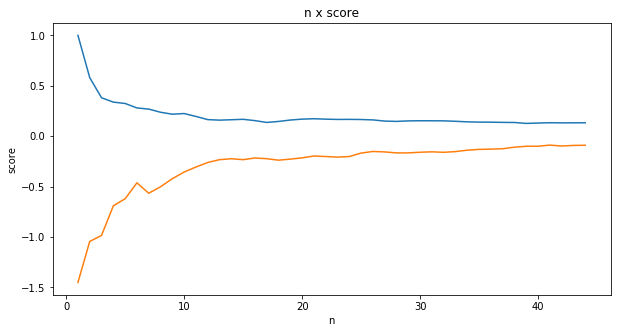

Bias x variance - target PNOITE - features 'PMANHA', 'PTARDE', 'CMANHA', 'CTARDE'
Melhor score:  0.833166259617
melhor n:  8


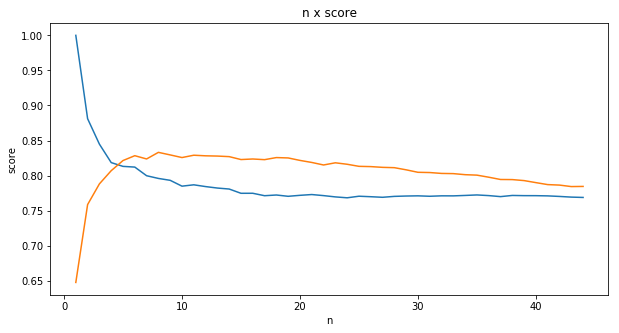

Bias x variance - target CNOITE - features 'PMANHA', 'PTARDE', 'CMANHA', 'CTARDE'
Melhor score:  0.47650492366
melhor n:  7


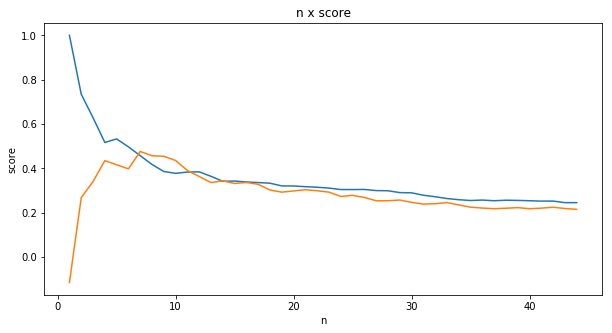

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt

print ('2.1 - Media terca feira manhã')
media_terca = np.mean(full_data[full_data['DIA'] == 'ter']['CMANHA'])
print ('Resposta: ', media_terca)

print ('2.2 - Quantas calorias o sistema deveria recomendar a noite para o usuário?')
passos_manha = 4761
calorias_manha = 397
calorias_tarde = 665

features = full_data[['PMANHA', 'CMANHA', 'CTARDE']]
target = full_data['PTARDE']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, train_size = 0.8, random_state = 42)

model = MLPRegressor(activation = 'relu', solver = 'lbfgs', random_state = 42)
#model = AdaBoostRegressor(random_state = 42)
#model = KNeighborsRegressor(n_neighbors = 5)
model.fit(X_train, y_train)
passos_tarde = model.predict([[passos_manha, calorias_manha, calorias_tarde]])
print ("Previsão de passos da tarde ",  passos_tarde)

features = full_data[['PMANHA', 'PTARDE', 'CMANHA', 'CTARDE']]#[full_data['DIA'] == 'quar']
target = full_data['PNOITE']#[full_data['DIA'] == 'quar']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, train_size = 0.8, random_state = 42)
model = MLPRegressor(activation = 'relu', solver = 'lbfgs', random_state = 42)
#model = AdaBoostRegressor(random_state = 42)
#model = KNeighborsRegressor(n_neighbors = 5)
model.fit(X_train, y_train)
passos_noite = model.predict([[passos_manha, passos_tarde, calorias_manha, calorias_tarde]])
print ("Previsão de passos para noite ",  passos_noite)

features = full_data[['PMANHA', 'PTARDE', 'CMANHA', 'CTARDE']]
target = full_data['CNOITE']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, train_size = 0.8, random_state = 42)

model = MLPRegressor(activation = 'relu', solver = 'lbfgs', random_state = 42)
#model = AdaBoostRegressor(random_state = 42)
#model = KNeighborsRegressor(n_neighbors = 5)
model.fit(X_train, y_train)
calorias_noite = model.predict([[passos_manha, passos_tarde, calorias_manha, calorias_tarde]])
print ("Resposta - Previsão de calorias para noite ",  calorias_noite)

print ("2.3 - Versão mais barata do context nutrion")
#- 2.3 Na versão mais barata, o usuário deverá informar quantos passos ele imagina que irá dar no dia e o sistema irá sugerir 
# uma quantidade total de calorias a ser gasto durante o dia. Considerando que o uruáio está em uma segunda feira, e deu como 
# entrada 13100 passos, quantas calorias o sistema deveria sugerir?
#    - ***tip*** crie duas estrutura, uma com a soma de todos os passos, e outra com a soma de todas as calorias (por dia)
#    - ***tip2***: vocês podem utilizar ferramentas como excel para manipular os dados
features = full_data['PASSOS_DIA']
target = full_data['CAL_DIA']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, train_size = 0.8, random_state = 42)

model = MLPRegressor(activation = 'relu', solver = 'lbfgs', random_state = 42)
#model = AdaBoostRegressor(random_state = 42)
#model = KNeighborsRegressor(n_neighbors = 5)
model.fit(X_train.values.reshape(-1, 1), y_train)
calorias_previsao_dia = model.predict([[13100]])
print ("Resposta - Previsão de calorias para o dia ",  calorias_previsao_dia)

print ("2.4 - Para esta questão, utilize o enunciado da 2.2, você deverá utilizar o modelo KNeighborsRegressor.")
print ("Utilize diferentes valores para o n_neighbors, de [1-45].")
print ("Compare os resultados e comente quanto a questão de BIAS x VARIANCE.\n")
print ("Bias x variance - target PTARDE - features PMANHA, CMANHA e CTARDE")

features = full_data[['PMANHA', 'CMANHA', 'CTARDE']]
target = full_data['PTARDE']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, train_size = 0.8, random_state = 42)

train_scores = []
test_scores = []

n = 45
for i in range(1, n):
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

print ('Melhor score: ', max(test_scores));
melhor_n = test_scores.index(max(test_scores)) + 1;
print ('melhor n: ', melhor_n);

plt.figure(figsize=(10, 5))
plt.plot(range(1, n), train_scores)
plt.plot(range(1, n), test_scores)
plt.title('n x score')
plt.xlabel('n')
plt.ylabel('score')
plt.show()

print ("Bias x variance - target PNOITE - features 'PMANHA', 'PTARDE', 'CMANHA', 'CTARDE'")
features = full_data[['PMANHA', 'PTARDE', 'CMANHA', 'CTARDE']]#[full_data['DIA'] == 'quar']
target = full_data['PNOITE']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, train_size = 0.8, random_state = 42)

train_scores = []
test_scores = []

n = 45
for i in range(1, n):
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

print ('Melhor score: ', max(test_scores));
melhor_n = test_scores.index(max(test_scores)) + 1;
print ('melhor n: ', melhor_n);

plt.figure(figsize=(10, 5))
plt.plot(range(1, n), train_scores)
plt.plot(range(1, n), test_scores)
plt.title('n x score')
plt.xlabel('n')
plt.ylabel('score')
plt.show()


print ("Bias x variance - target CNOITE - features 'PMANHA', 'PTARDE', 'CMANHA', 'CTARDE'")
features = full_data[['PMANHA', 'PTARDE', 'CMANHA', 'CTARDE']]
target = full_data['CNOITE']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, train_size = 0.8, random_state = 42)

train_scores = []
test_scores = []

n = 45
for i in range(1, n):
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

print ('Melhor score: ', max(test_scores));
melhor_n = test_scores.index(max(test_scores)) + 1;
print ('melhor n: ', melhor_n);

plt.figure(figsize=(10, 5))
plt.plot(range(1, n), train_scores)
plt.plot(range(1, n), test_scores)
plt.title('n x score')
plt.xlabel('n')
plt.ylabel('score')
plt.show()

### Resposta
digite a sua resposta do exercício 2

- 2.1 O usuário esqueceu a smart band em casa no período da manhã, de uma terça feira, quantas calorias o sistema deveria recomendar, neste período, para o usuário?

    - Baseado no dado estatístico da média para terça-feira período da manhã, 405 calorias.

- 2.2 O usuário consumiu 397 calorias pela manhã, 665 a tarde, e registrou 4761 passos pela manhã, de uma quarta feira. Quantas calorias o sistema deveria recomendar a noite para o usuário?

    - Previsão de calorias para noite de 637 obtido através de modelos para obter os passos da tarde, passos da noite para chegar  até o valor de calorias da noite. 

- 2.3 Na versão mais barata, o usuário deverá informar quantos passos ele imagina que irá dar no dia e o sistema irá sugerir uma quantidade total de calorias a ser gasto durante o dia. Considerando que o uruáio está em uma segunda feira, e deu como entrada 13100 passos, quantas calorias o sistema deveria sugerir?
    - Resposta - Previsão de calorias para o dia de 1999, utilizando o algoritmo MLPRegressor
    
- 2.4 para esta questão, utilize o enunciado da 2.2, você deverá utilizar o modelo KNeighborsRegressor. Utilize diferentes valores para o n_neighbors, de [1-45]. Compare os resultados e comente quanto a questão de BIAS x VARIANCE.
    - O bias x variance do target PTARDE foi extremamente baixo, próximo de zero. A causa disso deve ser investigada.
    - O bias x variance - target PNOITE foi mais alto, com melhor valor de 0.83.
    - Bias x variance do target CNOITE foi intermediário, com melhor valor de 0.47.